## シミュレーションしてエントロピーへの理解を深める

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
i1 = np.arange(0.01,0.5,0.01)
i2 = 1-i1
print(i1, i2, len(i1), 49*49)

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49] [0.99 0.98 0.97 0.96 0.95 0.94 0.93 0.92 0.91 0.9  0.89 0.88 0.87 0.86
 0.85 0.84 0.83 0.82 0.81 0.8  0.79 0.78 0.77 0.76 0.75 0.74 0.73 0.72
 0.71 0.7  0.69 0.68 0.67 0.66 0.65 0.64 0.63 0.62 0.61 0.6  0.59 0.58
 0.57 0.56 0.55 0.54 0.53 0.52 0.51] 49 2401


In [105]:
U = 100
M = 60
G = 12

pm1 = M/U
pm2 = 1-pm1
pg1 = G/U
pg2 = 1-pg1

#### 東大入試の例で検算

In [110]:
U = 637000
M = 9559
G = 3060

pm1 = M/U
pm2 = 1-pm1

pg1 = G/U
pg2 = 1-pg1

In [82]:
i1 = 0.456
i2 = 1-i1

m = 0.223

pi1m1 = m*pm1
pi2m1 = (1-m)*pm1
pi1m2 = i1*pm2
pi2m2 = i2*pm2

h = -pi1m1*np.log2(m)-pi2m1*np.log2(1-m)-pi1m2*np.log2(i1)-pi2m2*np.log2(i2)

print(pi1m1, pi1m2, h)

0.0033464003139717425 0.449157136577708 0.9909732316120554


## シミュレーション

In [111]:
Him = [[],[],[],[],[]]

for u in i1:
    for m in i1:
        pi1m1 = m*pm1
        pi2m1 = (1-m)*pm1
        pi1m2 = u*pm2
        pi2m2 = (1-u)*pm2
        Him[0].append(u)
        Him[1].append(m)
        Him[2].append(-pi1m1*np.log2(m)-pi2m1*np.log2(1-m)-pi1m2*np.log2(u)-pi2m2*np.log2(1-u))
        Him[3].append(-u*np.log2(u)-(1-u)*np.log2(1-u))
        Him[4].append(-m*np.log2(m)-(1-m)*np.log2(1-m))

In [112]:
df = pd.DataFrame({"P(i1|U)":Him[0], "P(i1|M)":Him[1], "H(I|M)": Him[2], "H(I)":Him[3], "H(M)":Him[4]})
df

,P(i1|U),P(i1|M),H(I|M),H(I),H(M)
0,0.01,0.01,0.080793,0.080793,0.080793
1,0.01,0.02,0.081703,0.080793,0.141441
2,0.01,0.03,0.082498,0.080793,0.194392
3,0.01,0.04,0.083217,0.080793,0.242292
4,0.01,0.05,0.083878,0.080793,0.286397
...,...,...,...,...,...
2396,0.49,0.45,0.999607,0.999711,0.992774
2397,0.49,0.46,0.999646,0.999711,0.995378
2398,0.49,0.47,0.999677,0.999711,0.997402
2399,0.49,0.48,0.999698,0.999711,0.998846


In [113]:
df.describe()

,P(i1|U),P(i1|M),H(I|M),H(I),H(M)
count,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,0.250000,0.250000,0.725679,0.725679,0.725679
std,0.141451,0.141451,0.257933,0.261832,0.261832
min,0.010000,0.010000,0.080793,0.080793,0.080793
25%,0.130000,0.130000,0.557438,0.557438,0.557438
50%,0.250000,0.250000,0.811278,0.811278,0.811278
75%,0.370000,0.370000,0.949631,0.950672,0.950672
max,0.490000,0.490000,0.999711,0.999711,0.999711


<AxesSubplot:xlabel='P(i1|M)', ylabel='H(I)'>

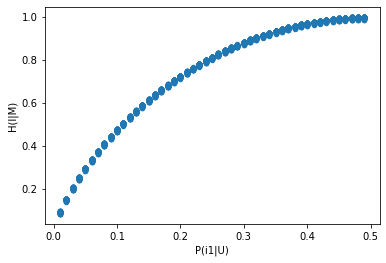

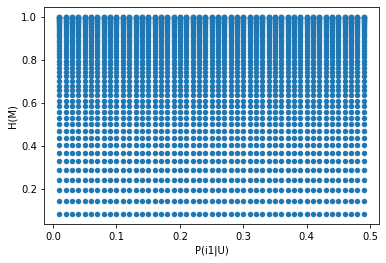

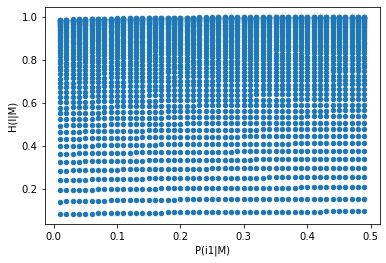

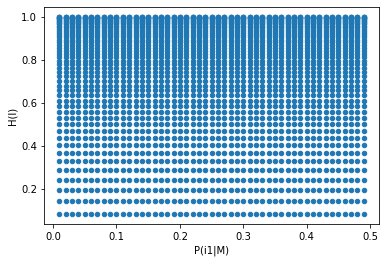

In [114]:
df.plot.scatter(x='P(i1|U)', y='H(I|M)')
df.plot.scatter(x='P(i1|U)', y='H(M)')

df.plot.scatter(x='P(i1|M)', y='H(I|M)')
df.plot.scatter(x='P(i1|M)', y='H(I)')

<class 'matplotlib.axes._subplots.Axes3DSubplot'>


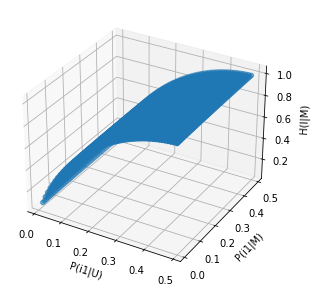

In [104]:
x1 = df[["P(i1|U)"]]
y1 = df[["P(i1|M)"]]
z1 = df[["H(I|M)"]]


plt.figure(figsize=(6, 5))
axes = plt.axes(projection="3d")
print(type(axes))
axes.scatter3D(x1, y1, z1)

axes.set_xlabel("P(i1|U)")
axes.set_ylabel("P(i1|M)")
axes.set_zlabel("H(I|M)")
plt.show()

## u=0.01の場合

<AxesSubplot:xlabel='P(i1|M)', ylabel='H(I|M)'>

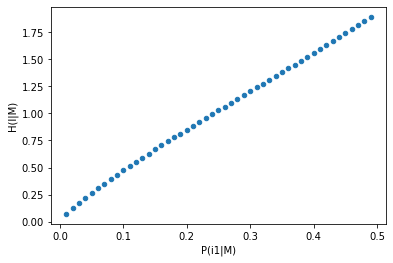

In [59]:
# df.plot.scatter(x='P(i1|U)', y='H(I|M)')
# df.plot.scatter(x='P(i1|U)', y='H(M)')

df.plot.scatter(x='P(i1|M)', y='H(I|M)')
# df.plot.scatter(x='P(i1|M)', y='H(I)')

In [66]:
x = df[["P(i1|M)"]]
y = df[["H(I|M)"]]
type(x)

pandas.core.frame.DataFrame

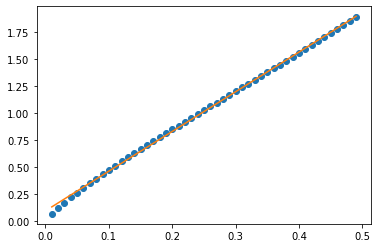

モデル関数の回帰変数 w1: 3.684
モデル関数の切片 w2: 0.095
y= 3.684x + 0.095
決定係数 R^2：  0.9989128621451591


In [68]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(x, y)

plt.plot(x, y, "o")
plt.plot(x, model_lr.predict(x), linestyle="solid")
plt.show()

print('モデル関数の回帰変数 w1: %.3f' %model_lr.coef_)
print('モデル関数の切片 w2: %.3f' %model_lr.intercept_)
print('y= %.3fx + %.3f' % (model_lr.coef_ , model_lr.intercept_))
print('決定係数 R^2： ', model_lr.score(x, y))

## エントロピー基本の可視化